# COURSE: A deep understanding of deep learning
## SECTION: Convolution and transformations
### LECTURE: The Conv2 class in PyTorch
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202108

In [128]:
# import libraries
import numpy as np
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

# Create a convolution instance

In [129]:
# create a conv2d class instance with parameters

# parameters
inChans  = 3 # RGB
outChans = 21
krnSize  = 7 # should be an odd number
stride   = 1
padding  = 2

# create the instance (cf nn.Linear)
c = nn.Conv2d(inChans,outChans,krnSize,stride,padding)

# let's have a look at it
print(c)
print(' ')

# check out its weight tensor; what are the dimensions?
print( 'Size of weights: ' + str(c.weight.shape) )
print( 'Size of bias: ' + str(c.bias.shape) )

Conv2d(3, 21, kernel_size=(7, 7), stride=(1, 1), padding=(2, 2))
 
Size of weights: torch.Size([21, 3, 7, 7])
Size of bias: torch.Size([21])


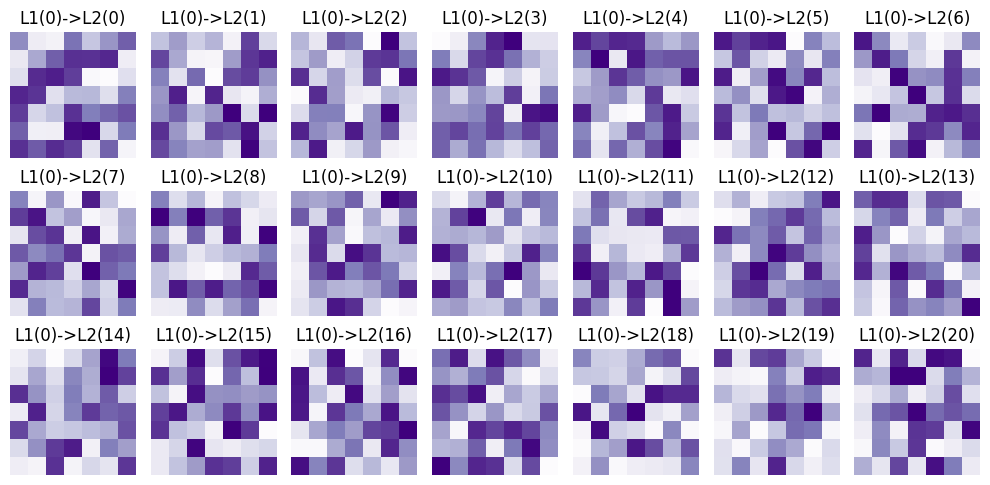

In [130]:
# What do these kernels look like?

fig,axs = plt.subplots(3,7,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):
  ax.imshow(torch.squeeze(c.weight[i,0,:,:]).detach(),cmap='Purples')
  ax.set_title('L1(0)->L2(%s)'%i)
  ax.axis('off')

plt.tight_layout()
plt.show()

In [131]:
# c = nn.Conv2d(inChans,outChans,krnSize,stride,padding)
lists = []
for i in range(len(c.weight)):
  lists.append((torch.sum(c.weight[i,0,:,:]),i))

lists

[(tensor(0.2113, grad_fn=<SumBackward0>), 0),
 (tensor(0.0474, grad_fn=<SumBackward0>), 1),
 (tensor(-0.2193, grad_fn=<SumBackward0>), 2),
 (tensor(0.4699, grad_fn=<SumBackward0>), 3),
 (tensor(0.6161, grad_fn=<SumBackward0>), 4),
 (tensor(0.1209, grad_fn=<SumBackward0>), 5),
 (tensor(0.0811, grad_fn=<SumBackward0>), 6),
 (tensor(0.0354, grad_fn=<SumBackward0>), 7),
 (tensor(-0.2941, grad_fn=<SumBackward0>), 8),
 (tensor(0.0055, grad_fn=<SumBackward0>), 9),
 (tensor(-0.0373, grad_fn=<SumBackward0>), 10),
 (tensor(-0.1343, grad_fn=<SumBackward0>), 11),
 (tensor(0.4927, grad_fn=<SumBackward0>), 12),
 (tensor(0.0032, grad_fn=<SumBackward0>), 13),
 (tensor(-0.0719, grad_fn=<SumBackward0>), 14),
 (tensor(0.2976, grad_fn=<SumBackward0>), 15),
 (tensor(-0.0306, grad_fn=<SumBackward0>), 16),
 (tensor(0.4922, grad_fn=<SumBackward0>), 17),
 (tensor(-0.7947, grad_fn=<SumBackward0>), 18),
 (tensor(-0.5170, grad_fn=<SumBackward0>), 19),
 (tensor(-0.1768, grad_fn=<SumBackward0>), 20)]

# Convolve with an image

torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


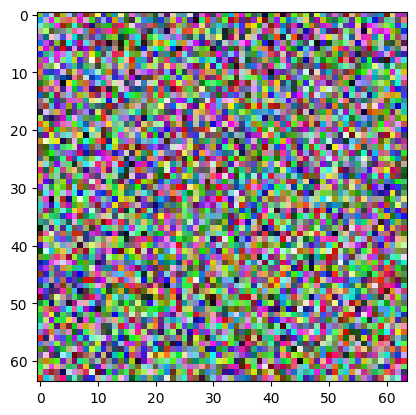

In [132]:
# size of the image (N, RGB, width, height)
imsize = (1,3,64,64)

img = torch.rand(imsize)

# pytorch wants channels first, but matplotlib wants channels last.
# therefore, tensors must be permuted to visualize
img2view = img.permute(2,3,1,0).numpy()
print(img.shape)
print(img2view.shape)

plt.imshow(np.squeeze(img2view));

In [133]:
# convolve the image with the filter bank (set of 'outChans' kernels)
convRes = c(img)

print(img.shape)
print(convRes.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 21, 62, 62])


In [134]:
convRes.shape

torch.Size([1, 21, 62, 62])

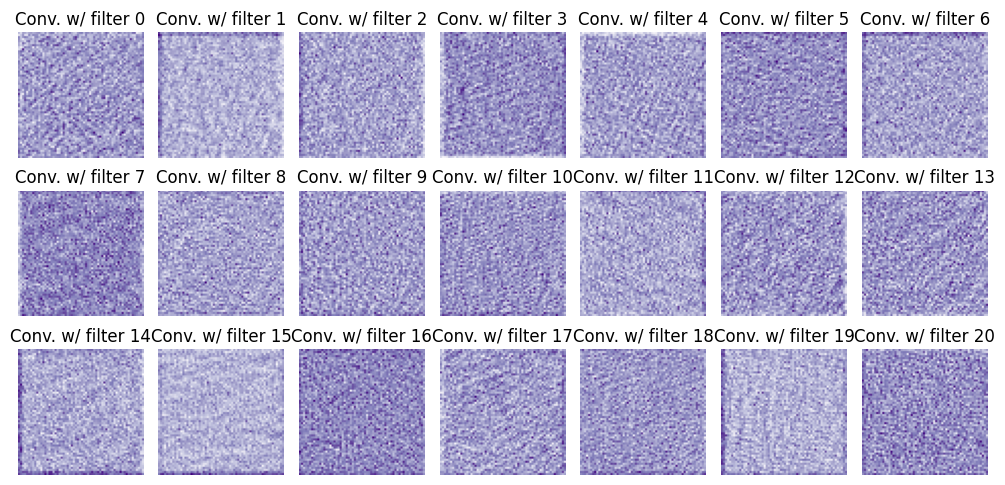

In [135]:
# What do the convolved images look like? (Hint: think of the bathtub picture.)

fig,axs = plt.subplots(3,7,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):

  # extract this "layer" of the convolution result
  I = torch.squeeze(convRes[0,i,:,:]).detach()

  # and visualize it
  ax.imshow(I,cmap='Purples')
  ax.set_title('Conv. w/ filter %s'%i)
  ax.axis('off')

plt.tight_layout()
plt.show()

# Additional explorations

In [7]:
# 1) Spend a few minutes changing the padding and stride parameters, and observe how those change the size of the result
#    of convolution (variable convRes). In the upcoming CodeChallenge, we'll look into this more rigorously, but it's
#    useful to have some initial familiarity.
#